<center style><h1>Computer Assignment 4</h1></center>
<center style><h1>Machine Learning Introduction</h1></center>

**In this assignment we are about to use Sickit-Learn library to learn Machine Learning. We are given a dataset about
movies and tv shows and we are going to predict their genre..**

## Review Data

### 1

We use pandas library to have an overview of our dataset.

Our only numeral data is release data which we described.


In [1]:
import pandas

dataset = pandas.read_csv('dataset.csv')
dataset

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 345.7+ KB


In [3]:
dataset.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### 2

Around 24% of countries and 12% of casts are not available.


In [4]:
(1 - (dataset.count() / len(dataset)))*100

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

## PreProcess

### 1

There are many methods to deal with missing data.
* Delete rows with missing data : This method is the easiest way to deal with missing problem.
A model trained with the removal of all missing data creates a robust and highly accurate model.
Deleting a particular row or a column with no specific information is better, since it does not have a high weightage.
On the other hand we lose a lot of information and in our case which lost data is around 31%, losing this amount of data
will damage our dataset.

* Replacing with Mean, Median, or Mode : Replacing with mean and median method can apply on numerical values like
human age. Replacing with mode is good approach for non-numerical values such as strings. This is a better approach
when the data size is small but imputing the approximations add variance and bias which in our data is very high.

So we choose to delete rows with missing values because there is no practical way to fill our missing data which are
non-numerical and values.

In [5]:
dataset.dropna(inplace=True)
(1 - (dataset.count() / len(dataset)))*100

type            0.0
title           0.0
cast            0.0
country         0.0
release_year    0.0
listed_in       0.0
description     0.0
dtype: float64

### 2

For numerical values we use Normalization when we want transform features to be on a similar scale.
The new point is calculated as $X_{new} = \frac{X - X_{min}}{X_{max} - X_{min}}$

On the other hand Standardization is the transformation of features by subtracting from mean and dividing by standard
deviation. This is often called as Z-score $X_{new} = \frac{X - \mu}{\sigma}$

In this case we use standardization, because we can see that the distribution is gaussian.
Also in this method our mean will be 0 and standard deviation zero.


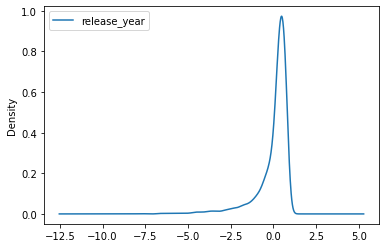

In [6]:
from matplotlib import pyplot as plot

dataset['release_year'] = (dataset['release_year'] - dataset['release_year'].mean()) / dataset['release_year'].std()
dataset.plot.density()
plot.show()

### 3

There are many method to work with categorical data such as :

* Frequency Encoding : Replace each category with its frequency of time that category occurred in that column.

* Number Encoding : Assign a number to each category.

We you both method above. Frequency encoding for country column and number encoding for type column.

In [7]:
dataset['new_c'] = 0
for index, row in dataset.iterrows():
    dataset['new_c'][index] = dataset['country'].value_counts()[row['country']]
dataset['country'] = dataset['new_c']
dataset.drop('new_c', axis=1, inplace=True)
dataset['type'] = dataset['type'].astype('category').cat.codes
dataset

C:\Users\SM2A\AppData\Local\Temp/ipykernel_4356/1831379086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['new_c'][index] = dataset['country'].value_counts()[row['country']]


,type,title,cast,country,release_year,listed_in,description
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",28,0.824128,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",956,0.824128,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,0,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",1,-2.331810,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,1,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",366,0.824128,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,0,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2747,0.824128,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",2747,-1.542825,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",2747,-1.993673,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",2747,0.035143,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",165,0.260568,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


### 4

First we change the format of data from string to list of string (words). Now we can process each word individual like
previous assignment. Also simply by iterating on list elements we can see the move genre.

In [8]:
for index, row in dataset.iterrows():
    category = str(dataset['listed_in'][index]).split(',')
    for c in category:
        if f'Listed In {c}' in dataset.columns:
            dataset[f'Listed In {c}'][index] = 1
        else :
            dataset[f'Listed In {c}'] = 0
            dataset[f'Listed In {c}'][index] = 1

C:\Users\SM2A\AppData\Local\Temp/ipykernel_4356/95100611.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'Listed In {c}'][index] = 1
C:\Users\SM2A\AppData\Local\Temp/ipykernel_4356/95100611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'Listed In {c}'][index] = 1
C:\Users\SM2A\AppData\Local\Temp/ipykernel_4356/95100611.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.c

### Feature Extraction From Text

In this part we use TF-IDF method to find our best features. We are going to find top 50 features for description, top
10 for cast, and top 10 for title.

In [9]:
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer

feature_list = []

def find_feature(name, count):
    corpus = dataset[name].tolist()
    vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\b[a-zA-Z]{3,}\b', ngram_range=(1, 1),stop_words='english')
    vectorized = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names()
    values = numpy.asarray(vectorized.sum(axis=0))[0]
    result = dict(zip(feature_names, values))
    result = dict(sorted(result.items(), key=lambda item: item[1]))
    i = 0
    while i < count:
        f = next(reversed(result.keys()))
        result.pop(f)
        if f not in feature_list:
            feature_list.append(f)
            dataset[f'Feature {f}'] = 0
        else:
            count += 1
        i += 1

find_feature('cast', 10)
find_feature('title', 10)
find_feature('description', 50)

for index, row in dataset.iterrows():
    for f in feature_list:
        title = dataset['title'][index].split().count(f)
        cast = dataset['cast'][index].split().count(f)
        description = dataset['description'][index].split().count(f)
        dataset[f'Feature {f}'][index] = title + cast + description

print(feature_list)
dataset

C:\Users\SM2A\PycharmProjects\AI_CA0\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SM2A\AppData\Local\Temp/ipykernel_4356/691586958.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[f'Feature {f}'] = 0
C:\Users\SM2A\AppData\Local\Temp/ipykernel_4356/691586958.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f'Feature {f}'][i

['david', 'michael', 'john', 'james', 'lee', 'paul', 'kim', 'chris', 'khan', 'kevin', 'love', 'man', 'christmas', 'life', 'world', 'time', 'movie', 'girl', 'story', 'house', 'young', 'new', 'family', 'woman', 'friends', 'school', 'father', 'series', 'finds', 'home', 'old', 'high', 'help', 'takes', 'lives', 'years', 'group', 'year', 'teen', 'daughter', 'son', 'city', 'mother', 'town', 'team', 'save', 'wife', 'past', 'true', 'documentary', 'mysterious', 'comedy', 'secret', 'friend', 'best', 'murder', 'death', 'war', 'boy', 'special', 'way', 'gets', 'crime', 'soon', 'tries', 'falls', 'student', 'couple', 'make', 'day']


,type,title,cast,country,release_year,listed_in,description,Listed In International TV Shows,Listed In TV Dramas,Listed In TV Mysteries,...,Feature way,Feature gets,Feature crime,Feature soon,Feature tries,Feature falls,Feature student,Feature couple,Feature make,Feature day
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",28,0.824128,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",956,0.824128,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",1,-2.331810,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",366,0.824128,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2747,0.824128,"Comedies, Dramas",A woman adjusting to life after a loss contend...,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",2747,-1.542825,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",2747,-1.993673,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",2747,0.035143,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",165,0.260568,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyse Relation Between Features


As we can see 'listed_in' feature is giving us more information gain than other features that we extrcted from text. So we
can simply ignore other features.

In [10]:
from sklearn.feature_selection import mutual_info_regression

rm_col = ['type', 'title', 'cast', 'description', 'listed_in']

target = dataset['type']
X = dataset.copy()
X = X.drop(columns=rm_col, axis=1)
_mutual_info_regression_ = mutual_info_regression(X, target)
_mutual_info_regression_ = pandas.Series(_mutual_info_regression_)
_mutual_info_regression_.index = X.columns
_mutual_info_regression_

country                             0.062516
release_year                        0.032649
Listed In International TV Shows    0.101768
Listed In  TV Dramas                0.102439
Listed In  TV Mysteries             0.008313
                                      ...   
Feature falls                       0.000000
Feature student                     0.000276
Feature couple                      0.000000
Feature make                        0.008279
Feature day                         0.000000
Length: 209, dtype: float64

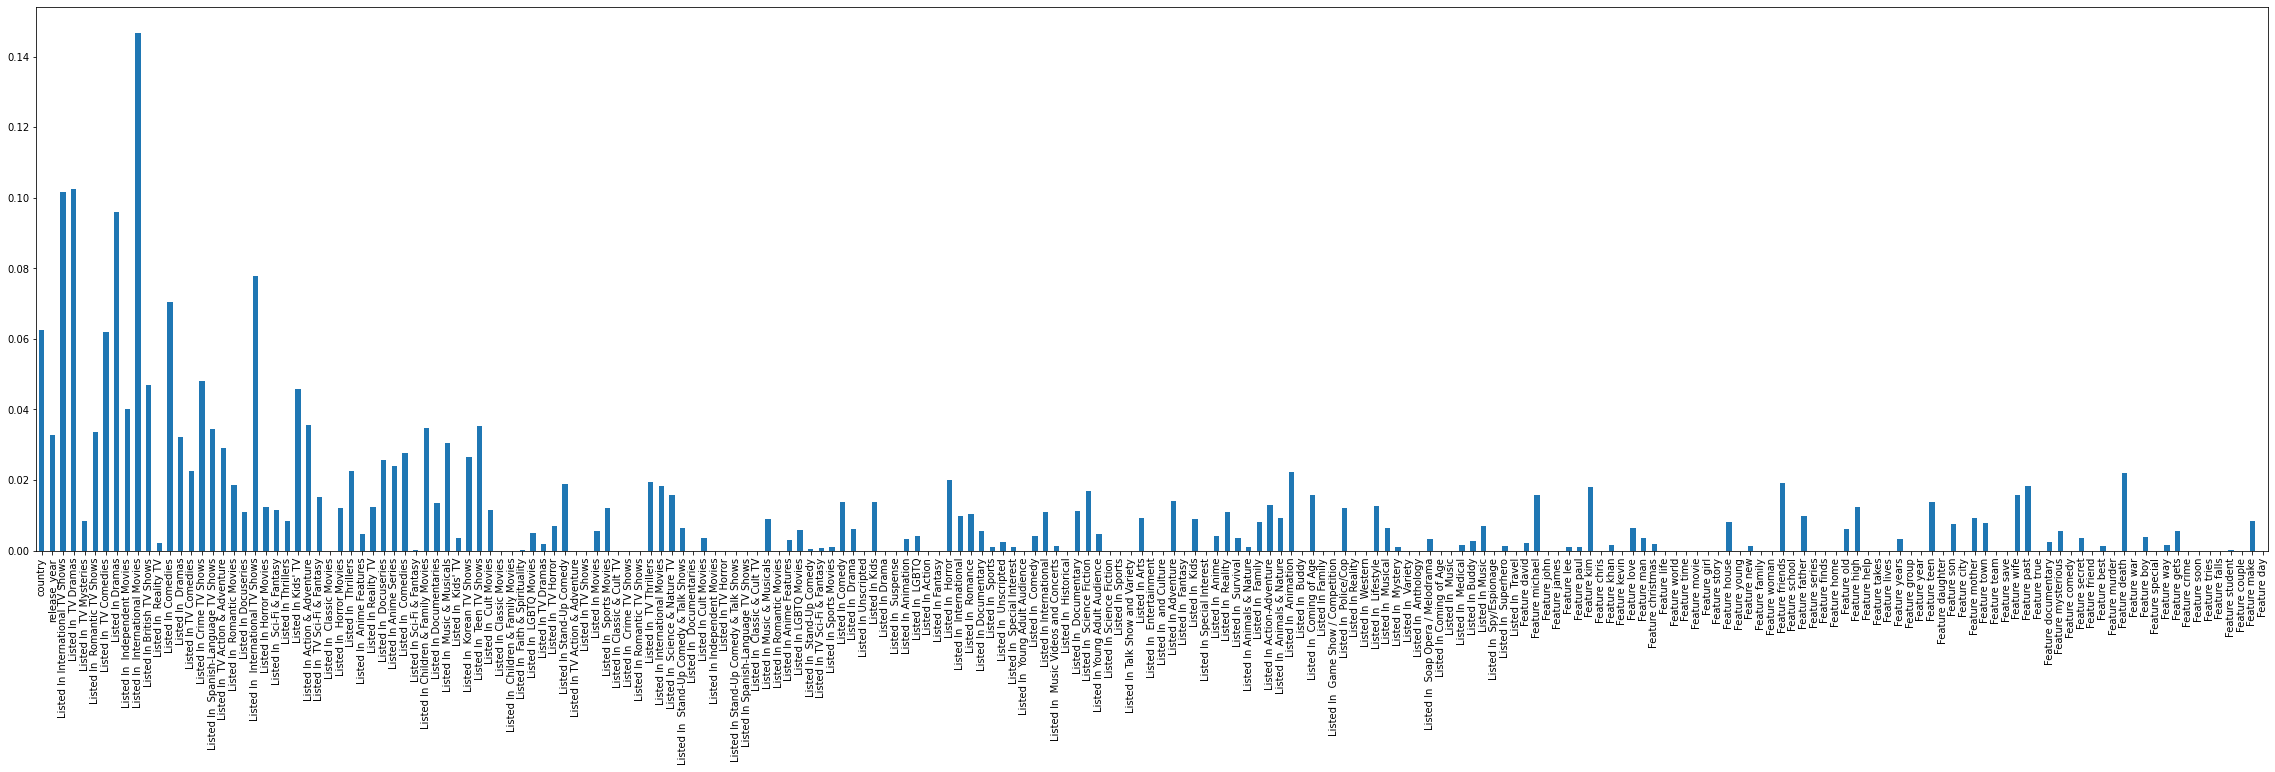

In [11]:
from matplotlib import pyplot as plot

plot.figure(figsize=(40,10))
_mutual_info_regression_.plot.bar()
plot.show()

## Goal Predction and Model Optimization
### 1
As we see, I tested many number of cases with different values over all parameters. In case of having few train data, we
might face a problem called underfitting. In this problem we have few data, so our prediction will match very accurately
with our data but might not deal with test data as good.

In [12]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

key = _mutual_info_regression_.keys()
val = _mutual_info_regression_.values

index = 0
for index in range(len(key)):
    if val[index] < 0.02:
        rm_col.append(key[index])

def d_t(max_depth, min_samples_split, ratio):
    X = dataset.drop(columns=rm_col, axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=ratio, random_state=40)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    regression = tree.DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
    regression = regression.fit(X_train, Y_train)
    test_predict = regression.predict(X_test)
    train_predict = regression.predict(X_train)
    test_matrix = confusion_matrix(Y_test, numpy.round(abs(test_predict)))
    train_matrix = confusion_matrix(Y_train, numpy.round(abs(train_predict)))
    test_accuracy = (test_matrix[0][0] + test_matrix[1][1]) / (test_matrix[0][0] + test_matrix[0][1] + test_matrix[1][0] + test_matrix[1][1]) * 100
    train_accuracy = (train_matrix[0][0] + train_matrix[1][1]) / (train_matrix[0][0] + train_matrix[0][1] + train_matrix[1][0] + train_matrix[1][1]) * 100
    print('Train Confusion Matrix : ', *train_matrix)
    print('Train Accuracy : ', train_accuracy)
    print('Test Confusion Matrix : ', *test_matrix)
    print('Test Accuracy : ', test_accuracy)
    print('----------------------------------------------------')
    
d_t(50, 2, 0.2)
d_t(50, 2, 0.02)
d_t(50, 2, 0.6)
d_t(50, 2, 0.98)

Train Confusion Matrix :  [4169   45] [ 209 1706]
Train Accuracy :  95.85576766193506
Test Confusion Matrix :  [1051   16] [ 74 392]
Test Accuracy :  94.12915851272015
----------------------------------------------------
Train Confusion Matrix :  [5119   59] [ 261 2069]
Train Accuracy :  95.73787959509856
Test Confusion Matrix :  [102   1] [ 9 42]
Test Accuracy :  93.5064935064935
----------------------------------------------------
Train Confusion Matrix :  [2085   29] [ 95 855]
Train Accuracy :  95.95300261096605
Test Confusion Matrix :  [3079   88] [ 181 1250]
Test Accuracy :  94.14963027403219
----------------------------------------------------
Train Confusion Matrix :  [97  1] [ 3 52]
Train Accuracy :  97.38562091503267
Test Confusion Matrix :  [4855  328] [ 420 1906]
Test Accuracy :  90.03862032227993
----------------------------------------------------


### 2
If we set our max depth very high, we make prediction more complex and there is high chance of overfitting. Also by having
very low max depth we might face underfitting because we made our prediction very simple.

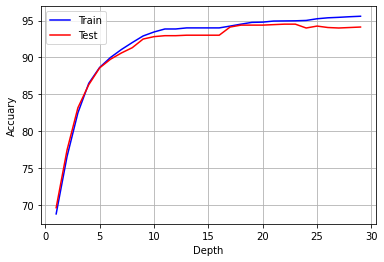

In [13]:
max_depth = list(range(1 , 30))
train_accuray = []
test_accuray = []

X = dataset.drop(columns=rm_col, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=40)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

for md in max_depth:
    regression = tree.DecisionTreeRegressor(max_depth=md, min_samples_split=2)
    regression = regression.fit(X_train, Y_train)
    test_predict = regression.predict(X_test)
    train_predict = regression.predict(X_train)
    test_matrix = confusion_matrix(Y_test, numpy.round(abs(test_predict)))
    train_matrix = confusion_matrix(Y_train, numpy.round(abs(train_predict)))
    test_accuray.append((test_matrix[0][0] + test_matrix[1][1]) / (test_matrix[0][0] + test_matrix[0][1] + test_matrix[1][0] + test_matrix[1][1]) * 100)
    train_accuray.append((train_matrix[0][0] + train_matrix[1][1]) / (train_matrix[0][0] + train_matrix[0][1] + train_matrix[1][0] + train_matrix[1][1]) * 100)

plot.plot(max_depth,train_accuray,label='Train',color='b')
plot.plot(max_depth,test_accuray,label='Test',color='r')
plot.grid()
plot.legend()
plot.xlabel('Depth')
plot.ylabel('Accuary')
plot.show()

## Group Learning Prediction
In both term of bias and variance, Random Forrest performs better. Because we are predicting our target on multiple trees
chance of overfitting and underfitting decreases because at the end we are combining all trees. So Random Forrests can
Perform better.

In [14]:
from sklearn.ensemble import RandomForestRegressor

def r_f(max_depth, min_split, n_estimators, max_samples, max_features, ratio):
    X = dataset.drop(columns=rm_col, axis=1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=ratio, random_state=40)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    print(f'Max Depth = {max_depth} , Min Samples Split = {min_split} , N Estimators = {n_estimators} , '
          f'Max Samples = {max_samples} , Max Features = {max_features}')
    regression = RandomForestRegressor(bootstrap=True, max_depth=max_depth, n_estimators=n_estimators,
                                       max_samples=max_samples, max_features=max_features,
                                       min_samples_split=min_split)
    regression = regression.fit(X_train, Y_train)
    test_predict = regression.predict(X_test)
    train_predict = regression.predict(X_train)
    test_matrix = confusion_matrix(Y_test, numpy.round(abs(test_predict)))
    train_matrix = confusion_matrix(Y_train, numpy.round(abs(train_predict)))
    test_accuracy = (test_matrix[0][0] + test_matrix[1][1]) / (test_matrix[0][0] + test_matrix[0][1] + test_matrix[1][0] + test_matrix[1][1]) * 100
    train_accuracy = (train_matrix[0][0] + train_matrix[1][1]) / (train_matrix[0][0] + train_matrix[0][1] + train_matrix[1][0] + train_matrix[1][1]) * 100
    print('Train Confusion Matrix : ', *train_matrix)
    print('Train Accuracy : ', train_accuracy)
    print('Test Confusion Matrix : ', *test_matrix)
    print('Test Accuracy : ', test_accuracy)
    print('----------------------------------------------------')
    
r_f(5, 2, 200, 5000, 0.1, 0.2)
r_f(10, 4, 200, 5000, 0.2, 0.2)
r_f(15, 6, 200, 5000, 0.25, 0.2)
r_f(20, 8, 200, 5000, 0.15, 0.2)
r_f(25, 10, 200, 5000, 0.1, 0.2)

Max Depth = 5 , Min Samples Split = 2 , N Estimators = 200 , Max Samples = 5000 , Max Features = 0.1
Train Confusion Matrix :  [4214    0] [ 583 1332]
Train Accuracy :  90.4878446728667
Test Confusion Matrix :  [1067    0] [146 320]
Test Accuracy :  90.47619047619048
----------------------------------------------------
Max Depth = 10 , Min Samples Split = 4 , N Estimators = 200 , Max Samples = 5000 , Max Features = 0.2
Train Confusion Matrix :  [4214    0] [ 367 1548]
Train Accuracy :  94.01207374775656
Test Confusion Matrix :  [1067    0] [108 358]
Test Accuracy :  92.95499021526419
----------------------------------------------------
Max Depth = 15 , Min Samples Split = 6 , N Estimators = 200 , Max Samples = 5000 , Max Features = 0.25
Train Confusion Matrix :  [4214    0] [ 360 1555]
Train Accuracy :  94.12628487518356
Test Confusion Matrix :  [1067    0] [105 361]
Test Accuracy :  93.15068493150685
----------------------------------------------------
Max Depth = 20 , Min Samples Spl